# Optimizing a Luxury Clothing Brand's Marketing Campaign Using Clustering

This activity is based on Data Science for Marketing books by Baig et al. (2019). This activity will look at a customer segmentation analysis for a luxury clothing brand. Thus, they can focus on a more promising segment to target their marketing campaign. This activity will focus more on a reliable and robust method to know the right number of segments. Thus, the objectives are: 

- Create customer segments for the marketing campaign
- Make a reliable analysis on how many segments are there from the customers base

    1. Import the necessary libraries for data processing, visualization, and clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # to perform kmeans analysis
from sklearn.preprocessing import StandardScaler  # to standardize data using z-score
from sklearn import decomposition  # the method for PCA is included in sklearn.decomposition library

    2. Read in the data from the file 'Clothing_Customers.csv' into a DataFrame and print the top 5 rows to understand it better. 

In [2]:
# load data set, then print their top 5 rows

df = pd.read_csv('Clothing_Customers.csv')
df.head(5)

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [7]:
# display info of all columns (column list, null count, data type)
# print  number of rows

display(df.info())
print('_')
print('Number of rows:', len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               1000 non-null   int64
 1   age                  1000 non-null   int64
 2   days_since_purchase  1000 non-null   int64
 3   annual_spend         1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


None

_
Number of rows: 1000


    3. Standardize all the columns in the data. You will be using all four columns for the segmentation.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = df.columns
df_scaled = df.copy()

In [17]:
# standardize all variables
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [18]:
# check whether the scaling is already done correctly
df_scaled.describe()

,income,age,days_since_purchase,annual_spend
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.593925e-17,2.078338e-16,-2.113865e-16,-1.561529e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.838791e+00,-2.162536e+00,-2.485080e+00,-2.456843e+00
25%,-8.351624e-01,-9.633307e-01,-9.774246e-01,-9.539527e-01
50%,-3.143254e-01,3.281210e-01,3.205864e-01,3.254092e-01
75%,9.802275e-01,7.893537e-01,8.067830e-01,8.065201e-01
max,2.514853e+00,2.265298e+00,1.930834e+00,1.941114e+00


    4. Visualize the data to get a good understanding of it. Since you are dealing with four dimensions, use PCA to reduce to two dimensions before plotting.

In [22]:
from sklearn import decomposition

n = 2
pca = decomposition.PCA(n_components=n)
pca_res = pca.fit_transform(df_scaled[cols_to_scale])

df_scaled['pc1'] = pca_res[:, 0]
df_scaled['pc2'] = pca_res[:, 1]

df_scaled.head()

,income,age,days_since_purchase,annual_spend,pc1,pc2
0,-0.890426,0.604861,0.753257,0.062276,-0.855025,0.935161
1,-0.553094,0.789354,1.306361,-0.058939,-0.963841,1.047314
2,-0.039778,-0.040865,-0.834688,0.898182,-0.350945,-0.742276
3,-0.516023,0.973847,-1.432398,0.671353,-0.833541,-0.960941
4,1.005897,-1.332317,-1.253977,-1.553129,2.476828,-0.755844


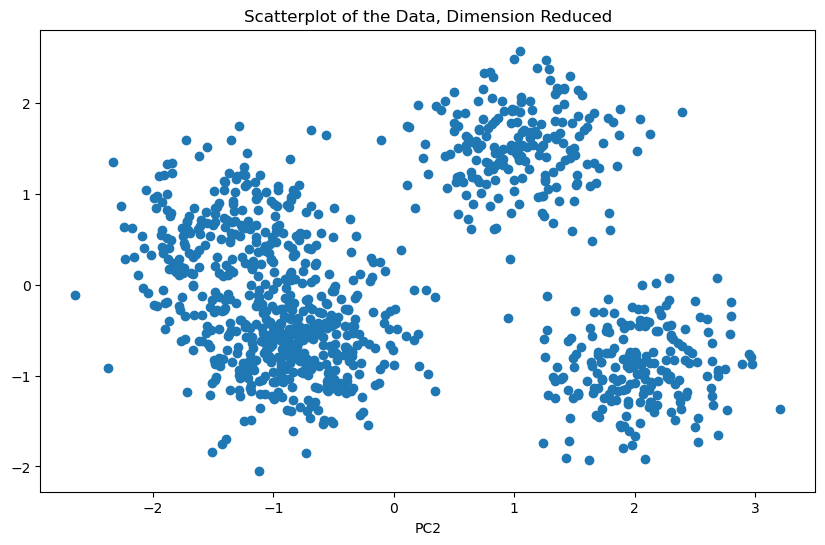

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(df_scaled['pc1'], df_scaled['pc2'])

plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Scatterplot of the Data, Dimension Reduced', size=12)
plt.show()

By visualizing with scatterplot, it seems there are 3 clusters from the data. But, I am going to analyze more with a visualization first, then doing a robust statistical analysis.

    5. Visualize clustering with two through seven clusters.

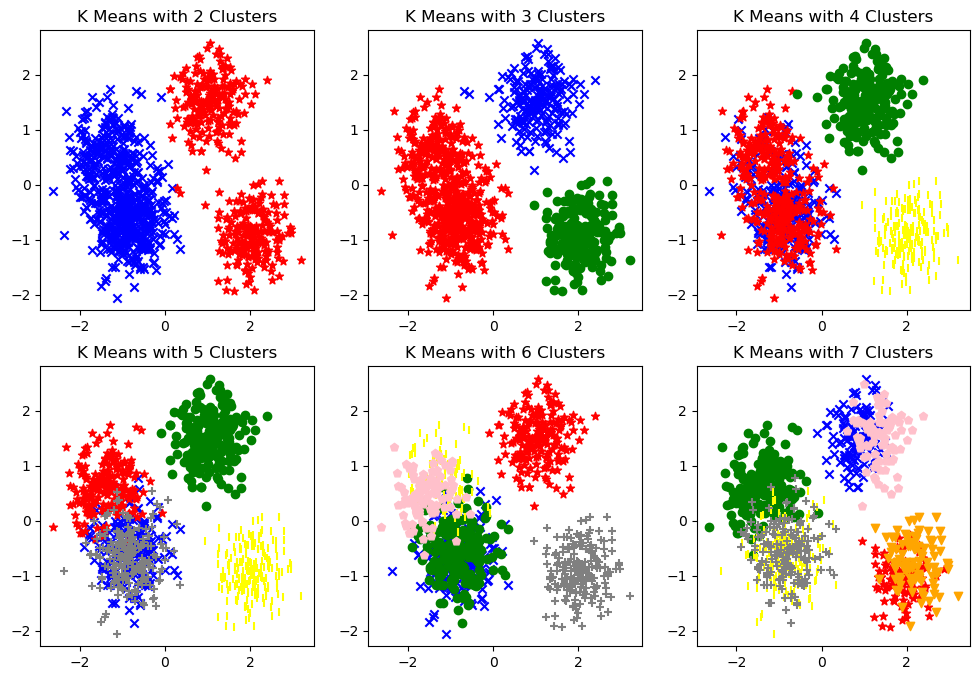

In [56]:
markers = ['x', '*', 'o', '|', '+', 'p', 'v']  # markers for plot, based on how many segmentations we made, in this case 3
colors = ['blue', 'red', 'green', 'yellow', 'gray', 'pink', 'orange']

plt.figure(figsize=(12, 8))

i = 1

for i in range(1, 7):
    
    n_clust = i + 1
    model = KMeans(n_clusters=n_clust, random_state=42)  # define the model for k means

    model.fit(df_scaled[cols_to_scale])  # fitting the model to the data
    df_scaled['cluster_ori'] = model.predict(df_scaled[cols_to_scale])  # predicting the cluster

    ax = plt.subplot(2, 3, i)
    for clust, color in zip(range(n_clust), colors):  # make loops to make the principal components plot
        temp = df_scaled[df_scaled['cluster_ori'] == clust]  # filter the data to only for one specific cluster
        plt.scatter(temp['pc1'], temp['pc2'], marker=markers[clust], label='Cluster' + str(clust), color=color)
        plt.title('K Means with ' + str(n_clust) + ' Clusters')
    
plt.show()

Even after giving color and marker to each cluster, we can see that segmentation with 3 clusters is the most fit with the data we have.

    6. Choosing clusters using elbow method - create a plot of the sum of squared errors and look for an elbow. Vary the number of clusters from 2 to 11. You should get the following plot.

<function matplotlib.pyplot.show(close=None, block=None)>

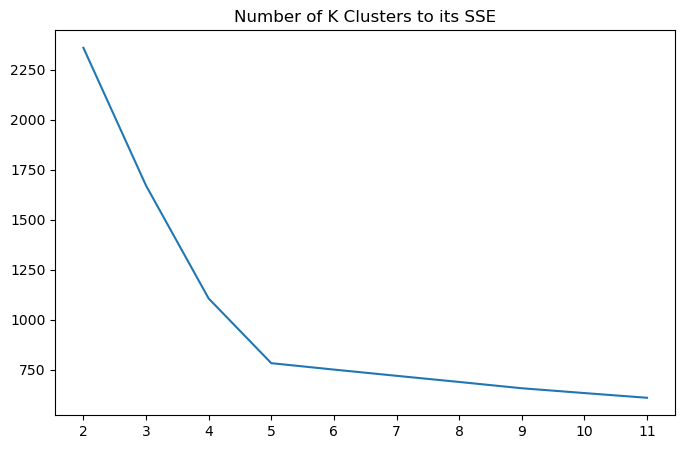

In [82]:
sse_s = []
df_sse_s = pd.DataFrame()

for n_clust in range(2, 12):    
    
    model = KMeans(n_clusters=n_clust, random_state=42)  # define the model for k means
    model.fit(df_scaled[cols_to_scale])  # fitting the model to the data
    sse = model.inertia_
    sse_s.append(sse)
    
    row_df = n_clust - 2
    df_sse_s.loc[row_df, 'n_cluster'] = n_clust
    df_sse_s.loc[row_df, 'sse'] = sse
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 12), sse_s)
plt.title('Number of K Clusters to its SSE')
plt.xticks(range(2, 12))
plt.show

In [81]:
# print the actual value of sse
df_sse_s

,n_cluster,sse
0,2.0,2360.178137
1,3.0,1671.112798
2,4.0,1106.277102
3,5.0,782.783572
4,6.0,750.674526
5,7.0,719.606686
6,8.0,688.805157
7,9.0,657.330163
8,10.0,633.276182
9,11.0,609.712723


    7. Do both the methods agree on the optimal number of clusters? Looking at the results from both, and based on your business understanding, what is the number of clusters you would choose? Explain your decision.

To be able to answer this, we have to plot all the data based on the number of the clusters.

# Summary

Thus, this is the way to perform K-Means clustering, **assuming that we already know how many group of segmentations from the population**. All in all, the steps are as following:

1. Perform standard scaling for all the variables we're going to include in the model
2. Perform the K-Means clustering by specifying the algorithm for distance, random state, and the data we're going to include
3. For multiple dimensions, reduce the dimensionality of the variables (here, I used PCA) to visualize the clusters clearly
4. To interpret the results and label the clusters, plot all the characteristic variables by the clusters, then compare.